In [1]:
from dotenv import load_dotenv
import os 

load_dotenv()


True

In [2]:
os.environ['TAVILY_API_KEY']=os.getenv('TAVILY_API_KEY')
os.environ['GROQ_API_KEY']=os.getenv('GROQ_API_KEY')

Arxiv (Research Papers) tool

In [3]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [4]:
api_wrappper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrappper_arxiv)
print(arxiv.run("chatgpt"))

Published: 2023-10-05
Title: In ChatGPT We Trust? Measuring and Characterizing the Reliability of ChatGPT
Authors: Xinyue Shen, Zeyuan Chen, Michael Backes, Yang Zhang
Summary: The way users acquire information is undergoing a paradigm shift with the
advent of ChatGPT. Unlike conventional search engines, ChatGPT retrieves
knowledge from the model itself and generates answers for users. ChatGPT's
impressive question-answering (QA) capability has attracted more than 100
million users within a shor


In [5]:
arxiv.invoke("chatgpt")

"Published: 2023-10-05\nTitle: In ChatGPT We Trust? Measuring and Characterizing the Reliability of ChatGPT\nAuthors: Xinyue Shen, Zeyuan Chen, Michael Backes, Yang Zhang\nSummary: The way users acquire information is undergoing a paradigm shift with the\nadvent of ChatGPT. Unlike conventional search engines, ChatGPT retrieves\nknowledge from the model itself and generates answers for users. ChatGPT's\nimpressive question-answering (QA) capability has attracted more than 100\nmillion users within a shor"

Wikipedia tool

In [6]:
WIKIPEDIA_API_WRAPPER=WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=WIKIPEDIA_API_WRAPPER)
wiki.name

'wikipedia'

In [7]:
wiki.invoke("what is chatgpt?")

'Page: ChatGPT\nSummary: ChatGPT is a generative artificial intelligence chatbot developed by OpenAI and released on November 30, 2022. It currently uses GPT-5, a generative pre-trained transformer (GPT), to generate text, speech, and images in response to user prompts. It is credited with accelerating the AI boom, an ongoing period of rapid investment in and public attention to the field of artificial intelligence (AI). OpenAI operates the service on a freemium model.\nBy January 2023, ChatGPT had'

Tavily Tool

In [8]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily=TavilySearchResults()


/tmp/ipykernel_23855/2706930453.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily=TavilySearchResults()


In [47]:
tavily.invoke('14_Ordinance_No_XV_of_2015___The_exemption_of_withholding_tax_under_sub_section__4__of_Section_236P_of_the_Income_Tax_Ordinance__2001_available_to_Pakistan_Real_time_Interbank_Settlement_Mechanism__PRSM__has_been_withdrawn.pdf')

[{'title': 'Income Tax Ordinance - Federal Board Of Revenue Government Of ...',
  'url': 'https://www.fbr.gov.pk/categ/income-tax-ordinance/326',
  'content': '| 14 | Ordinance No XV of 2015 - The exemption of withholding tax under sub-section (4) of Section 236P of the Income Tax Ordinance, 2001 available to Pakistan Real-time Interbank Settlement Mechanism (PRSM) has been withdrawn |\n| 15 | Corrections in 15 % Surcharge on Income Tax payable during the period 15th March, 2011 up to 30th June 2011. (Ordinance No IV of 2011 - issued vide No F.2(1) 12011- Pub dated 15th March 2011 | [...] | Sr.No | Title |\n --- |\n| 1 | Income Tax Ordinance, 2001 Amended upto 31.07.2025 |\n| 2 | Income Tax Ordinance, 2001 Amended upto 30.06.2024 |\n| 3 | Income Tax Ordinance, 2001 Amended upto 04.05.2024 |\n| 4 | Income Tax Ordinance, 2001 Amended upto 30.06.2023 |\n| 5 | Income Tax Ordinance, 2001 amended up to 30th June 2022 |\n| 6 | Income Tax Ordinance, 2001 updated upto 30 June 2021 |\n| 7 | Inco

combine all the tools in list 

In [10]:
tools=[arxiv,wiki,tavily]

In [11]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="deepseek-r1-distill-llama-70b")
llm.invoke("What is the capital of France?")

AIMessage(content='<think>\n\n</think>\n\nThe capital of France is Paris.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 10, 'total_tokens': 22, 'completion_time': 0.036836376, 'prompt_time': 0.017841322, 'queue_time': 0.00166445, 'total_time': 0.054677698}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_76307ac09b', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--2189e75a-c337-4f6c-b4b9-dd8083b9954e-0', usage_metadata={'input_tokens': 10, 'output_tokens': 12, 'total_tokens': 22})

In [15]:
llm_with_tools=llm.bind_tools(tools)
llm_with_tools.invoke('attention is all you need research paper')

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking about the "Attention is All You Need" research paper. I remember that\'s the one introducing the Transformer model, which is super influential in NLP.\n\nFirst, I should find the exact title to make sure I get the right paper. It\'s probably on ArXiv since that\'s where most ML papers are published.\n\nI\'ll use the arxiv tool with the query "Attention is All You Need". This should fetch the correct paper and its details.\n\nOnce I have the paper, I can provide the user with a summary or key points if they need more information.\n', 'tool_calls': [{'id': '2f1ewrs1r', 'function': {'arguments': '{"query":"Attention is All You Need"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 149, 'prompt_tokens': 329, 'total_tokens': 478, 'completion_time': 0.725470177, 'prompt_time': 0.039597297, 'queue_time': 0.563031796, 'total_time': 0.765067474}, 'model_name

In [19]:
from langchain_core.messages import HumanMessage,AIMessage

llm_with_tools.invoke([HumanMessage(content=f'what is the recent ai news?')]).tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'recent AI news'},
  'id': 'nzzd9xf60',
  'type': 'tool_call'}]

Langgraph

In [21]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]


In [ ]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import tools_condition,ToolNode


def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state['messages'])]}


In [34]:
builder=StateGraph(State)
builder.add_node('tool_calling_llm',tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,'tool_calling_llm')
builder.add_conditional_edges(
    'tool_calling_llm',
    tools_condition
)
builder.add_edge("tools",END)

graph=builder.compile()

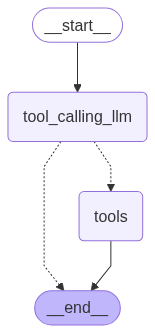

In [35]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [46]:
messages=graph.invoke({'messages':HumanMessage(content='i want 14_Ordinance_No_XV_of_2015___The_exemption_of_withholding_tax_under_sub_section__4__of_Section_236P_of_the_Income_Tax_Ordinance__2001_available_to_Pakistan_Real_time_Interbank_Settlement_Mechanism__PRSM__has_been_withdrawn.pdf pdf websearch')})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

i want 14_Ordinance_No_XV_of_2015___The_exemption_of_withholding_tax_under_sub_section__4__of_Section_236P_of_the_Income_Tax_Ordinance__2001_available_to_Pakistan_Real_time_Interbank_Settlement_Mechanism__PRSM__has_been_withdrawn.pdf pdf websearch
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (3rdhqwdvt)
 Call ID: 3rdhqwdvt
  Args:
    query: 14_Ordinance_No_XV_of_2015___The_exemption_of_withholding_tax_under_sub-section_4_of_Section_236P_of_the_Income_Tax_Ordinance_2001_available_to_Pakistan_Real-time_Interbank_Settlement_Mechanism__PRSM__has_been_withdrawn.pdf
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "WHT imposed on Prism transactions", "url": "https://www.brecorder.com/news/4346935", "content": "Under the Ordinance, in section 236P, in sub-sect